<a href="https://colab.research.google.com/github/jsalinas1501/upc_data-mining/blob/master/PC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica Calificada 2

Bienvenid@s a su segunda práctica calificada

Como ya sabrán, este curso es el mejor de todos y, para celebrar eso, hoy los voy a dejar ser y aplicar todo lo que han aprendido en esta segunda parte del curso.

En clases hemos visto el caso del Titanic. Ahora imaginen que son Data Scientists del futuro y van a predecir si los pasajeros de una nave espacial, llamada también Titanic, serán teletransportados a otra dimensión. Pueden encontrar más información acerca del dataset [aquí](https://www.kaggle.com/competitions/spaceship-titanic/overview)

In [1]:
## Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Data
url = 'https://raw.githubusercontent.com/aladelca/machine_learning_model/main/archivos_trabajo/train%20(6).csv'
data = pd.read_csv(url)
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Lo que tienen que hacer

Obviamente, lo que tienen que hacer es crear un modelo que prediga si es que un pasajero será teletransportado o no a otra dimensión, pero tienen que tener las siguientes consideraciones:

*   Tienen que probar, al menos, 5 modelos (si un algoritmo tiene diferentes hiperparámetros, se considera un modelo distinto) - 5 puntos
*   Dentro de esos modelos, tienen que utilizar sí o sí `KNeighborsClassifier` con `n_neighbors = 8`- 5 puntos
*   Deben hacer un correcto uso de variables categóricas y generar más variables en función a las que ya tienen (sumarlas, transformarlas de alguna manera, agregarlas, etc.). Mientras más creativo sea su feature engineering, más puntaje tendrán (y su modelo será mejor) - 2 puntos
*   Para cada uno de los modelos, deben reportar la matriz de confusión, `accuracy_score`, `recall_score`, `auc_score` y curva ROC. - 5 puntos
*   Todos los alumnos entrarán a una competencia y los últimos 3 puntos de su práctica serán distribuidos en función a qué tan bueno es su modelo en `accuracy_score` en función al modelo de sus compañeros. Ustedes deben indicar claramente qué modelo de todos los que han hecho van a utilizar para la competencia.

Recuerden que también pueden aplicar las técnicas que vimos en la primera parte del curso (imputación de valores nulos, outliers, etc.)





In [52]:
### Que la magia empiece aquí

##Primero cambiamos los valores de HomePlanet a columnas True - False

data['HomePlanet_Europa'] = np.where((data['HomePlanet']=='Europa'), True, False)
data['HomePlanet_Earth'] = np.where((data['HomePlanet']=='Earth'), True, False)

VARS = ['HomePlanet_Europa','HomePlanet_Earth','CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
TARGET = ['Transported']

x = data[VARS]
y = data[TARGET]

In [53]:
### Train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 104)
print(x_train.shape)
print(x_test.shape)

(6954, 10)
(1739, 10)


In [56]:
### Análisis exploratorio de variables

##### Valores nulos o en blanco
x_train.isna().mean() ###Porcentaje de valores nulos por columna

HomePlanet_Europa    0.000000
HomePlanet_Earth     0.000000
CryoSleep            0.023871
Age                  0.020708
VIP                  0.024159
RoomService          0.021139
FoodCourt            0.021858
ShoppingMall         0.023008
Spa                  0.021858
VRDeck               0.021427
CryoSleep_knn        0.000000
Age_knn              0.000000
VIP_knn              0.000000
RoomService_knn      0.000000
FoodCourt_knn        0.000000
ShoppingMall_knn     0.000000
Spa_knn              0.000000
VRDeck_knn           0.000000
dtype: float64

In [55]:
#### Imputación de valores en blanco

#x_train['HomePlanet_media'] = x_train['HomePlanet'].fillna('no_data')
#x_train['HomePlanet_mediana'] = x_train['HomePlanet'].fillna('no_data')
#x_test['HomePlanet_media'] = x_test['HomePlanet'].fillna('no_data')
#x_test['HomePlanet_mediana'] = x_test['HomePlanet'].fillna('no_data')

#### Otros métodos de imputación

from sklearn.impute import KNNImputer

imputer = KNNImputer()
x_train['CryoSleep_knn'] = imputer.fit_transform(x_train[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])[:,0]
x_test['CryoSleep_knn'] = imputer.transform(x_test[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])[:,0]

x_train['Age_knn'] = imputer.fit_transform(x_train[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])[:,1]
x_test['Age_knn'] = imputer.transform(x_test[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])[:,1]

x_train['VIP_knn'] = imputer.fit_transform(x_train[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])[:,2]
x_test['VIP_knn'] = imputer.transform(x_test[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])[:,2]

x_train['RoomService_knn'] = imputer.fit_transform(x_train[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])[:,3]
x_test['RoomService_knn'] = imputer.transform(x_test[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])[:,3]

x_train['FoodCourt_knn'] = imputer.fit_transform(x_train[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])[:,4]
x_test['FoodCourt_knn'] = imputer.transform(x_test[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])[:,4]

x_train['ShoppingMall_knn'] = imputer.fit_transform(x_train[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])[:,5]
x_test['ShoppingMall_knn'] = imputer.transform(x_test[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])[:,5]

x_train['Spa_knn'] = imputer.fit_transform(x_train[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])[:,6]
x_test['Spa_knn'] = imputer.transform(x_test[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])[:,6]

x_train['VRDeck_knn'] = imputer.fit_transform(x_train[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])[:,7]
x_test['VRDeck_knn'] = imputer.transform(x_test[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])[:,7]

In [57]:
##### Manejo de variables categóricas

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()


x_train[enc.get_feature_names_out()[0]] = enc.fit_transform(x_train[['CryoSleep_knn']]).toarray()[:,0]
x_train[enc.get_feature_names_out()[1]] = enc.fit_transform(x_train[['CryoSleep_knn']]).toarray()[:,1]

x_test[enc.get_feature_names_out()[0]] = enc.transform(x_test[['CryoSleep_knn']]).toarray()[:,0]
x_test[enc.get_feature_names_out()[1]] = enc.transform(x_test[['CryoSleep_knn']]).toarray()[:,1]

In [58]:
x_train.columns

Index(['HomePlanet_Europa', 'HomePlanet_Earth', 'CryoSleep', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'CryoSleep_knn', 'Age_knn', 'VIP_knn', 'RoomService_knn',
       'FoodCourt_knn', 'ShoppingMall_knn', 'Spa_knn', 'VRDeck_knn',
       'CryoSleep_False', 'CryoSleep_True'],
      dtype='object')

In [59]:
#### Escalamiento de datos en caso de algoritmos de distancia

from sklearn.preprocessing import StandardScaler

esc = StandardScaler()
x_train_esc =pd.DataFrame(esc.fit_transform(x_train[['HomePlanet_Europa', 'HomePlanet_Earth', 'CryoSleep', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'CryoSleep_knn', 'Age_knn', 'VIP_knn', 'RoomService_knn',
       'FoodCourt_knn', 'ShoppingMall_knn', 'Spa_knn', 'VRDeck_knn',
       'CryoSleep_False', 'CryoSleep_True']]),
                          columns = ['HomePlanet_Europa', 'HomePlanet_Earth', 'CryoSleep', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'CryoSleep_knn', 'Age_knn', 'VIP_knn', 'RoomService_knn',
       'FoodCourt_knn', 'ShoppingMall_knn', 'Spa_knn', 'VRDeck_knn',
       'CryoSleep_False', 'CryoSleep_True'],
                          index = x_train.index)

x_test_esc =pd.DataFrame(esc.transform(x_test[['HomePlanet_Europa', 'HomePlanet_Earth', 'CryoSleep', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'CryoSleep_knn', 'Age_knn', 'VIP_knn', 'RoomService_knn',
       'FoodCourt_knn', 'ShoppingMall_knn', 'Spa_knn', 'VRDeck_knn',
       'CryoSleep_False', 'CryoSleep_True']]),
                          columns = ['HomePlanet_Europa', 'HomePlanet_Earth', 'CryoSleep', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'CryoSleep_knn', 'Age_knn', 'VIP_knn', 'RoomService_knn',
       'FoodCourt_knn', 'ShoppingMall_knn', 'Spa_knn', 'VRDeck_knn',
       'CryoSleep_False', 'CryoSleep_True'],
                          index = x_test.index)

In [60]:
####################################
######## Regresión logística #######
####################################

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

modelo_rl = LogisticRegression()
modelo_rl_mediana = LogisticRegression()
modelo_svm = SVC(probability = True)

t_columns = ['HomePlanet_Europa', 'HomePlanet_Earth', 'Age_knn', 'VIP_knn', 'RoomService_knn',
       'FoodCourt_knn', 'ShoppingMall_knn', 'Spa_knn', 'VRDeck_knn',
       'CryoSleep_False', 'CryoSleep_True']

modelo_rl.fit(x_train[t_columns], y_train)
modelo_rl_mediana.fit(x_train[t_columns], y_train)
modelo_svm.fit(x_train[t_columns], y_train)


preds = modelo_rl.predict(x_test[t_columns])
preds_mediana = modelo_rl_mediana.predict(x_test[t_columns])
preds_svm = modelo_svm.predict(x_test[t_columns])

preds_proba = modelo_rl.predict_proba(x_test[t_columns])
preds_proba_mediana = modelo_rl_mediana.predict_proba(x_test[t_columns])
preds_proba_svm = modelo_svm.predict_proba(x_test[t_columns])

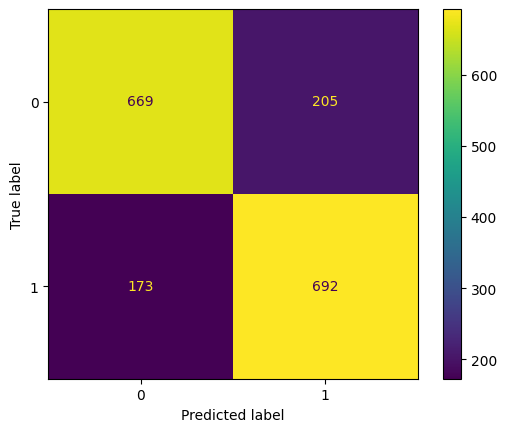

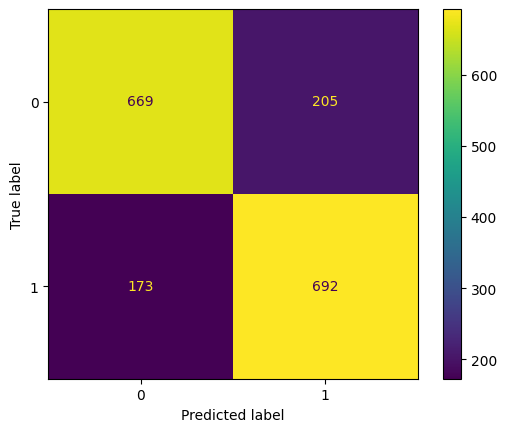

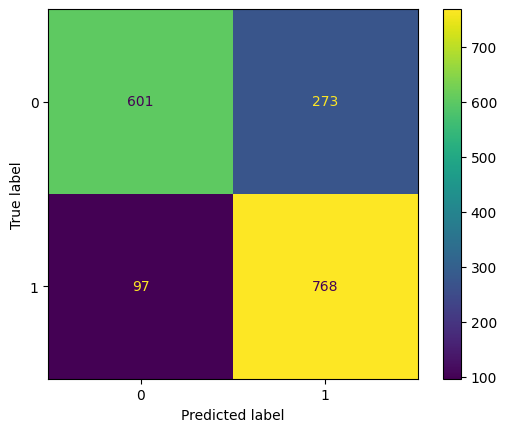

In [61]:
#### Evaluar al modelo Regresión logística

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, roc_auc_score, roc_curve, auc

cm_rl = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(cm_rl)

cm_rl_mediana = confusion_matrix(y_test, preds_mediana)
disp_mediana = ConfusionMatrixDisplay(cm_rl_mediana)

cm_svm = confusion_matrix(y_test, preds_svm)
disp_svm = ConfusionMatrixDisplay(cm_svm)


disp.plot()
disp_mediana.plot()
disp_svm.plot()
plt.show()

In [62]:
### Accuracy

#print('Accuracy:',(669+692)/(669+205+692+173)) ##### Total de valores predichos correctamente sobre total de valores
#print('Accuracy Mediana:',(669+692)/(669+205+692+173)) ##### Total de valores predichos correctamente sobre total de valores
#print('Sensibilidad:', 692/(692+173))#### Qué tan bueno es el modelo prediciendo positivos
#print('Especificidad:',669/(669+205))#### Qué tan bueno es el modelo prediciendo negativos
print('Accuracy:',accuracy_score(y_test, preds))
print('Sensibilidad:', recall_score(y_test, preds, pos_label = 1))
print('Especificidad:', recall_score(y_test, preds, pos_label = 0))

Accuracy: 0.7826336975273146
Accuracy Mediana: 0.7826336975273146
Sensibilidad: 0.8
Especificidad: 0.7654462242562929
Accuracy: 0.7826336975273146
Sensibilidad: 0.8
Especificidad: 0.7654462242562929


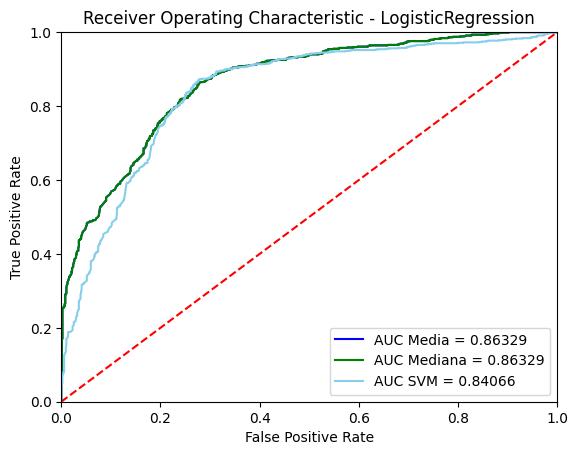

In [63]:
probas = preds_proba[:,1]
probas_mediana = preds_proba_mediana[:,1]
probas_svm = preds_proba_svm[:,1]
fpr, tpr, threshold = roc_curve(y_test, probas)
fpr_mediana, tpr_mediana, threshold_mediana = roc_curve(y_test, probas_mediana)
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, probas_svm)
roc_auc = auc(fpr, tpr)
roc_auc_mediana = auc(fpr_mediana, tpr_mediana)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.title('Receiver Operating Characteristic - LogisticRegression')
plt.plot(fpr, tpr, 'b', label = 'AUC Media = %0.5f' % roc_auc)
plt.plot(fpr_mediana, tpr_mediana, 'g', label = 'AUC Mediana = %0.5f' % roc_auc_mediana)
plt.plot(fpr_svm, tpr_svm, 'skyblue', label = 'AUC SVM = %0.5f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [65]:
####################################
######## Random Forest #############
####################################


######## MODELO MAS PRECISO - EVALUAR #############

from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators = 500)
modelo_rf.fit(x_train[t_columns], y_train)
preds_rf = modelo_rf.predict(x_test[t_columns])
preds_probas_rf = modelo_rf.predict_proba(x_test[t_columns])

In [66]:
####################################
######## Boosting ##################
####################################

from sklearn.ensemble import GradientBoostingClassifier

modelo_boosting = GradientBoostingClassifier()
modelo_boosting.fit(x_train[t_columns], y_train)
preds_boosting = modelo_boosting.predict(x_test[t_columns])
preds_probas_boosting = modelo_boosting.predict_proba(x_test[t_columns])

In [67]:
####################################
###### KNeighborsClassifier ########
####################################

from sklearn.neighbors import KNeighborsClassifier

modelo_kn = KNeighborsClassifier(n_neighbors=8)
modelo_kn.fit(x_train[t_columns], y_train)
preds_kn = modelo_kn.predict(x_test[t_columns])
preds_probas_kn = modelo_kn.predict_proba(x_test[t_columns])

In [68]:
####################################
###### DecisionTreeClassifier ######
####################################

from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier()
modelo_dt.fit(x_train[t_columns], y_train)
preds_dt = modelo_dt.predict(x_test[t_columns])
preds_probas_dt = modelo_dt.predict_proba(x_test[t_columns])

In [75]:
#Evaluar modelos - Accuracy, RecallScore
print('Accuracy - Random Forest:',accuracy_score(y_test, preds_rf))
print('Sensibilidad - Random Forest::', recall_score(y_test, preds_rf, pos_label = 1))
print('Especificidad - Random Forest::', recall_score(y_test, preds_rf, pos_label = 0))
print('************************************************')
print('Accuracy - Boosting:',accuracy_score(y_test, preds_boosting))
print('Sensibilidad - Boosting:', recall_score(y_test, preds_boosting, pos_label = 1))
print('Especificidad - Boosting:', recall_score(y_test, preds_boosting, pos_label = 0))
print('************************************************')
print('Accuracy - KNeighbor:',accuracy_score(y_test, preds_kn))
print('Sensibilidad - KNeighbor:', recall_score(y_test, preds_kn, pos_label = 1))
print('Especificidad - KNeighbor:', recall_score(y_test, preds_kn, pos_label = 0))
print('************************************************')
print('Accuracy - DecisionTree:',accuracy_score(y_test, preds_dt))
print('Sensibilidad - DecisionTree:', recall_score(y_test, preds_dt, pos_label = 1))
print('Especificidad - DecisionTree:', recall_score(y_test, preds_dt, pos_label = 0))

Accuracy - Random Forest: 0.7924094307073031
Sensibilidad - Random Forest:: 0.8161849710982659
Especificidad - Random Forest:: 0.7688787185354691
************************************************
Accuracy - Boosting: 0.7952846463484762
Sensibilidad - Boosting: 0.8647398843930636
Especificidad - Boosting: 0.7265446224256293
************************************************
Accuracy - KNeighbor: 0.7659574468085106
Sensibilidad - KNeighbor: 0.7375722543352601
Especificidad - KNeighbor: 0.7940503432494279
************************************************
Accuracy - DecisionTree: 0.7469810235767682
Sensibilidad - DecisionTree: 0.8
Especificidad - DecisionTree: 0.6945080091533181


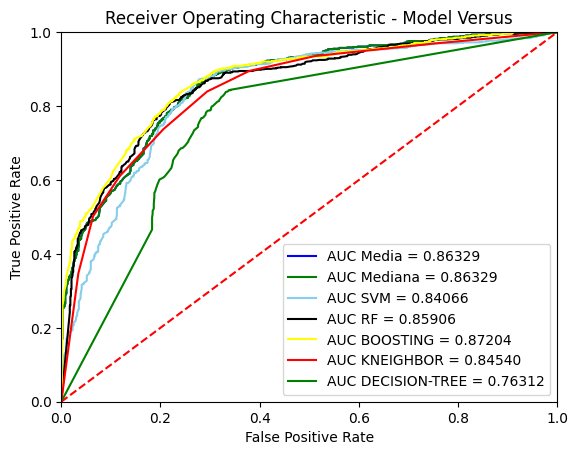

In [73]:
#### Evaluar los 5 modelos - ROC Curve
probas = preds_proba[:,1]
probas_mediana = preds_proba_mediana[:,1]
probas_svm = preds_proba_svm[:,1]
probas_rf = preds_probas_rf[:,1]
probas_boosting = preds_probas_boosting[:,1]
probas_kn = preds_probas_kn[:,1]
probas_dt = preds_probas_dt[:,1]

fpr, tpr, threshold = roc_curve(y_test, probas)
fpr_mediana, tpr_mediana, threshold_mediana = roc_curve(y_test, probas_mediana)
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, probas_svm)
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, probas_rf)
fpr_boosting, tpr_boosting, threshold_boosting = roc_curve(y_test, probas_boosting)
fpr_kn, tpr_kn, threshold_kn = roc_curve(y_test, probas_kn)
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, probas_dt)

roc_auc = auc(fpr, tpr)
roc_auc_mediana = auc(fpr_mediana, tpr_mediana)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_boosting = auc(fpr_boosting, tpr_boosting)
roc_auc_kn = auc(fpr_kn, tpr_kn)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.title('Receiver Operating Characteristic - Model Versus')
plt.plot(fpr, tpr, 'b', label = 'AUC Media = %0.5f' % roc_auc)
plt.plot(fpr_mediana, tpr_mediana, 'g', label = 'AUC Mediana = %0.5f' % roc_auc_mediana)
plt.plot(fpr_svm, tpr_svm, 'skyblue', label = 'AUC SVM = %0.5f' % roc_auc_svm)
plt.plot(fpr_rf, tpr_rf, 'black', label = 'AUC RF = %0.5f' % roc_auc_rf)
plt.plot(fpr_boosting, tpr_boosting, 'yellow', label = 'AUC BOOSTING = %0.5f' % roc_auc_boosting)
plt.plot(fpr_kn, tpr_kn, 'red', label = 'AUC KNEIGHBOR = %0.5f' % roc_auc_kn)
plt.plot(fpr_dt, tpr_dt, 'green', label = 'AUC DECISION-TREE = %0.5f' % roc_auc_dt)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()